# Business Problem
## if x is do this ..., then y is get that ...
## x(independent variable),y(dependent variable)

In [189]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [190]:
df  = pd.read_csv('D:/DATA/Projects/predective datasets/Sample_dataset_prediction.csv')

In [191]:
df.head()
# 0x=violet(2y),5x=violet(3y)
# 1x,3x,5x,7x,9x=green(1y) and 2x,4x,6x,8x=red(0y)

,x,y
0,0,2
1,1,1
2,2,0
3,3,1
4,4,0


In [192]:
df.tail()

,x,y
5,5,3
6,6,0
7,7,1
8,8,0
9,9,1


In [193]:
df.shape

(10, 2)

## Discover and visualize the data to gain insights

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       10 non-null     int64
 1   y       10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [195]:
df.describe()

,x,y
count,10.00000,10.000000
mean,4.50000,0.900000
std,3.02765,0.994429
min,0.00000,0.000000
25%,2.25000,0.000000
50%,4.50000,1.000000
75%,6.75000,1.000000
max,9.00000,3.000000


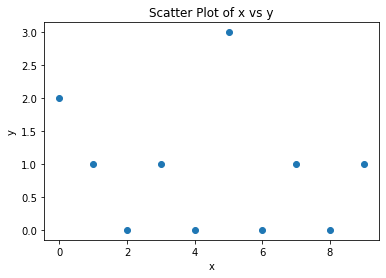

In [196]:
plt.scatter(x =df.x, y = df.y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of x vs y")
plt.show()

## Prepare the data for Machine Learning algorithms 

In [197]:
# Data Cleaning

In [198]:
df.isnull().sum()

x    0
y    0
dtype: int64

In [199]:
df.mean()

x    4.5
y    0.9
dtype: float64

In [200]:
df2 = df.fillna(df.mean())

In [201]:
df2.isnull().sum()

x    0
y    0
dtype: int64

In [202]:
df2.head()

,x,y
0,0,2
1,1,1
2,2,0
3,3,1
4,4,0


In [203]:
# split dataset

In [204]:
X = df2.drop("y", axis = "columns")  #drop y column
y = df2.drop("x", axis = "columns")  #drop x column
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (10, 1)
shape of y =  (10, 1)


In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (8, 1)
shape of y_train =  (8, 1)
shape of X_test =  (2, 1)
shape of y_test =  (2, 1)


# Select a model and train it

In [206]:
 # y = m * x + c
 from sklearn.linear_model import LinearRegression
 lr = LinearRegression()

In [207]:
lr.fit(X_train,y_train)

LinearRegression()

In [208]:
lr.coef_

array([[-0.0754717]])

In [209]:
lr.intercept_

array([1.35849057])

In [210]:
m = -0.75
c = 5.5
# y  = m * x + c 
y  = m * 7 + c 
y

0.25

In [211]:
# lr.predict([[x]])[0][0].round(2)
lr.predict([[9]])[0][0].round(2)

0.68

In [212]:
y_pred  = lr.predict(X_test)
y_pred

array([[1.13207547],
       [1.05660377]])

In [213]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["x", "y","predicted"])

,x,y,predicted
0,3.0,1.0,1.132075
1,4.0,0.0,1.056604


## Fine-tune your model

In [214]:
lr.score(X_test,y_test)

-1.2677109291562831

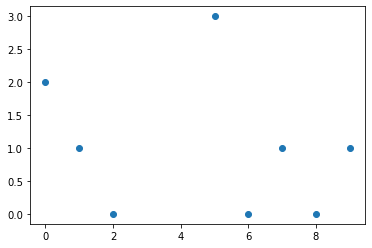

In [215]:
plt.scatter(X_train,y_train)

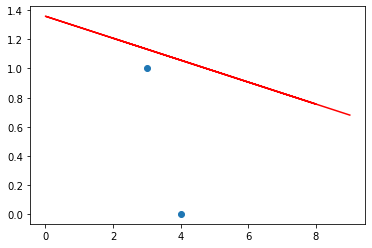

In [216]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

## Present your solution

## Save Ml Model

In [217]:
#we save this model as model
import joblib
joblib.dump(lr, "Sample_model_prediction.pkl")

['Sample_model_prediction.pkl']

In [218]:
model = joblib.load("Sample_model_prediction.pkl")

In [219]:
model.predict([[5]])[0][0]

0.9811320754716981

# Launch, monitor, and maintain your system